In [3]:
%pip install seaborn

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [8]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.date =pd.to_datetime(df.date)
df = df.set_index('date')

In [10]:
df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [11]:
df = df.loc[(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))]

In [12]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


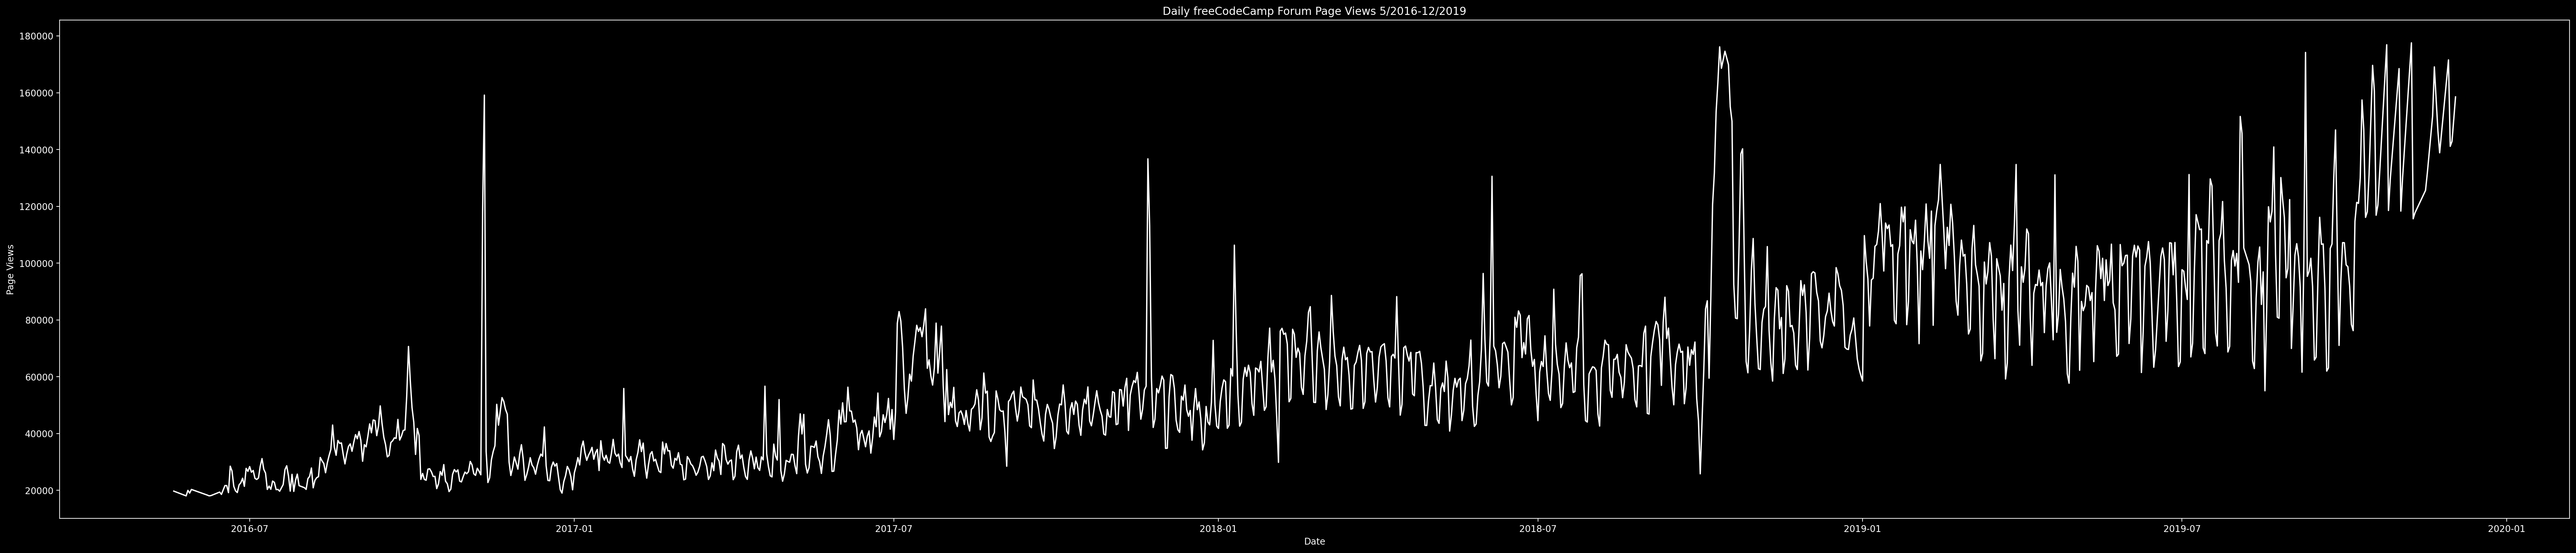

In [34]:

fig, ax = plt.subplots(figsize=(50,10), dpi=200)
plt.plot(df.value, color='white')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.style.use('dark_background')
plt.savefig('Daily.png', dpi=300, bbox_inches='tight')

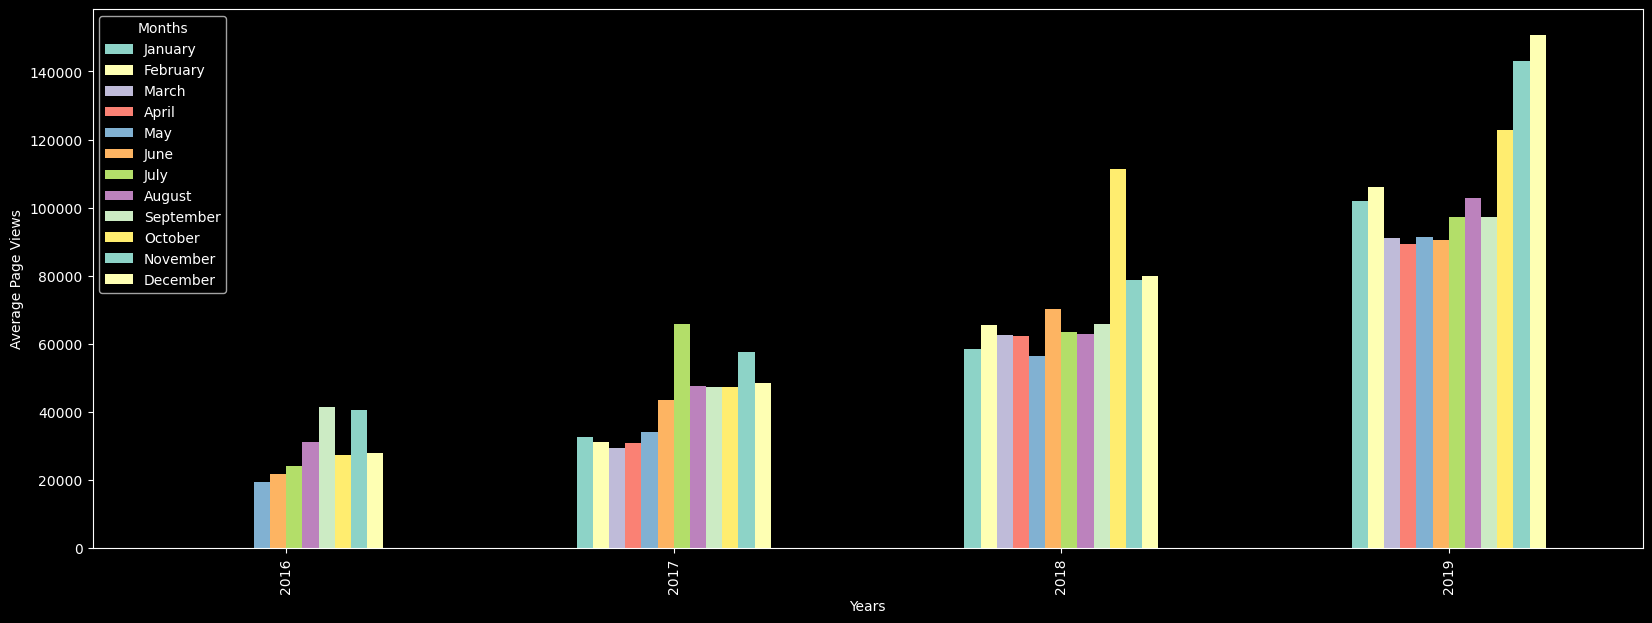

In [56]:
df_bar = df.copy()
df_bar.index=pd.to_datetime(df_bar.index)
df_bar["month"]= df_bar.index.month
df_bar["year"]= df_bar.index.year
df_bar=df_bar.groupby(["year","month"])["value"].mean().unstack()

fig = df_bar.plot(kind='bar', figsize=(20,7))
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(loc=2, fontsize = 10, labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title='Months')
plt.savefig('Figue.png', dpi=300, bbox_inches='tight')


In [51]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0, 0.5, 'Page Views')

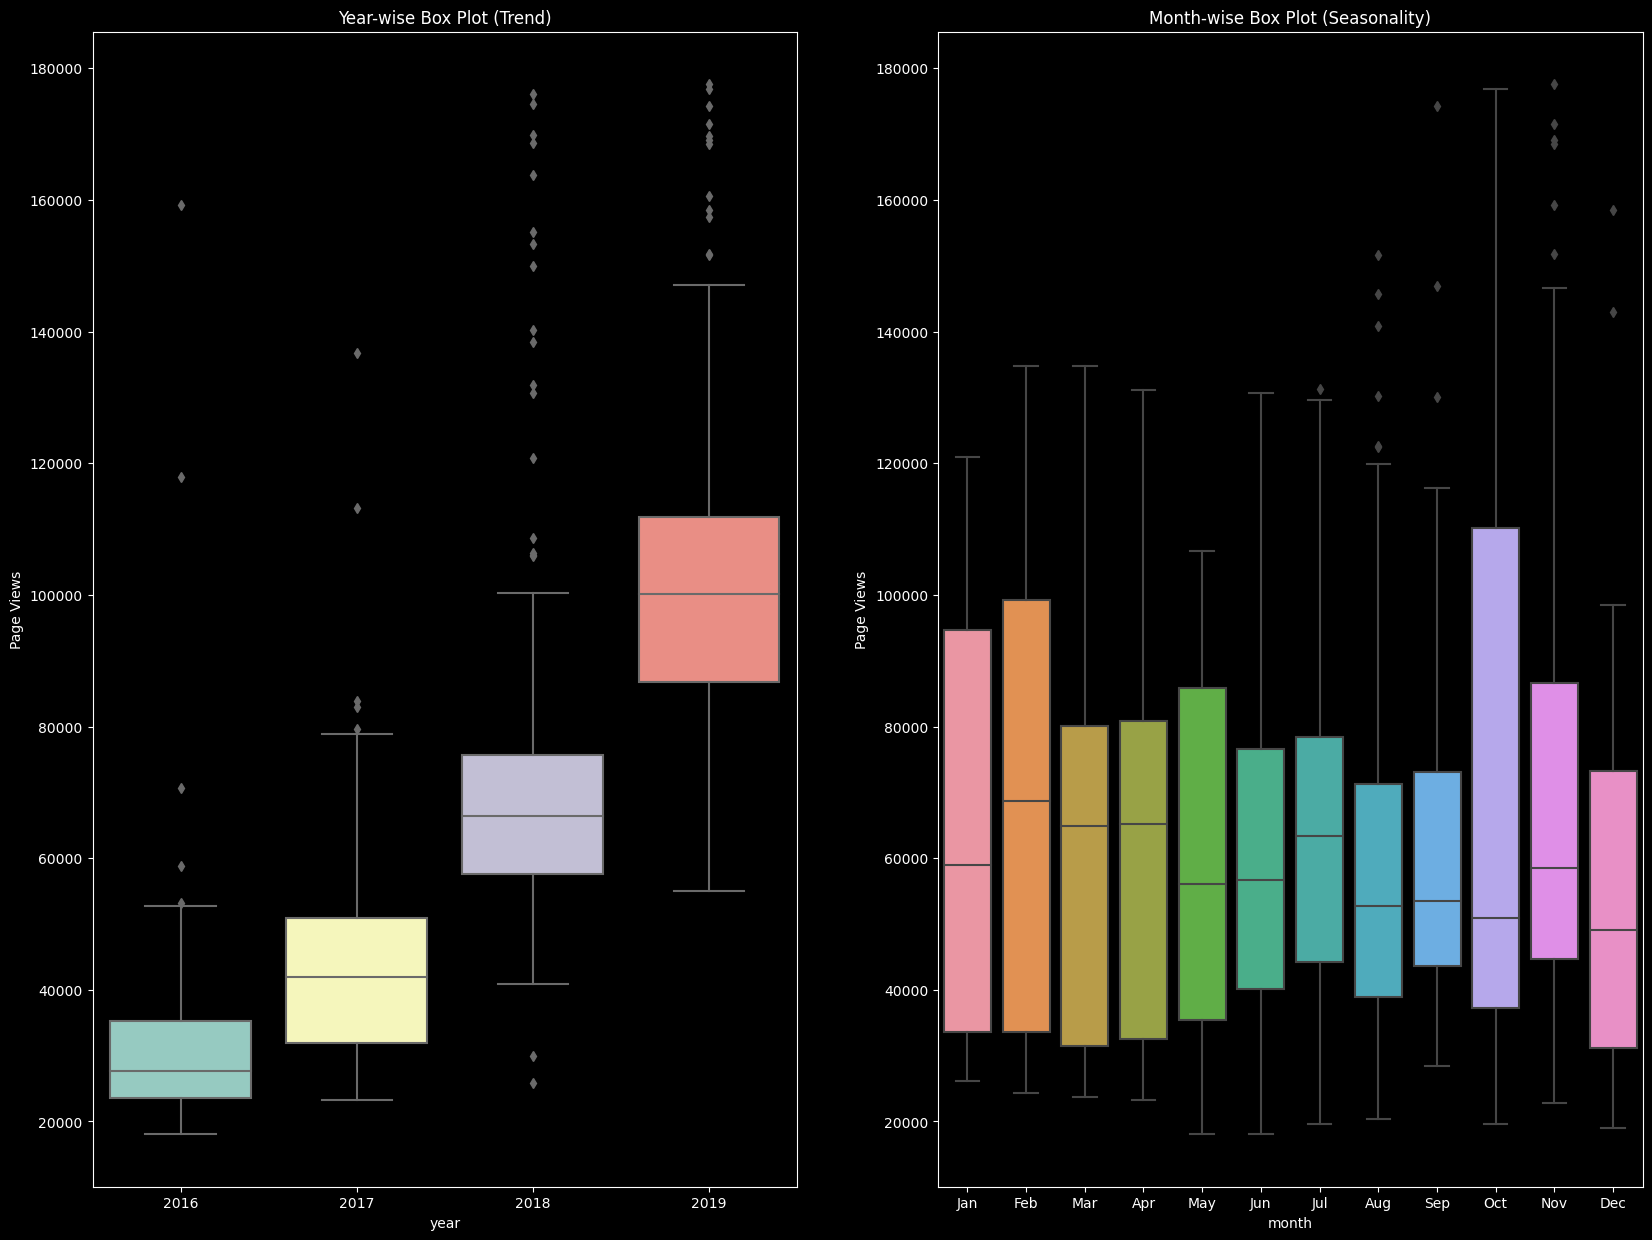

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))
sns.boxplot(x='year', y='value', ax=axes[0], data=df_box)
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_ylabel("Page Views")
months= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.boxplot(x='month', y='value', ax=axes[1], data=df_box, order=months)
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_ylabel("Page Views")